## Programming for Data Analysis
**Course: HDip in Computing in Data Analytics**  
**Module: Applied Statistics**  
**Author: Stefania Verduga**  

***

## Table of Contents
1. Introduction
    - 1.1. Description of the Project
    - 1.2. Objectives of the Project
    - 1.3. Technology and Libraries used for this project
    - 1.4. Data Visualization
2. T-Test Statistic
    - 2.1 Formula for the t-Test statistic
    - 2.2 Hypothesis
    - 2.3 Distribution
    - 2.4 P-value
    - 2.5 Analysis
3. ANOVA
    - 3.1 Type of tests
    - 3.2 Key Components of ANOVA
    - 3.3 How does an ANOVA test work?
    - 3.4 Analysis
4. Why ANOVA instead of T-Test?
5. Conclusion
6. References
***

## 1. Introduction

**1.1. Description of the Project.**  

The purpose of this project is to analyze the PlantGrowth R dataset[01]. The PlantGrowth data are the results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions. This dataset contains two main variables, a treatment group and the weight of plants within those groups. 

In order to analze this dataset, I will follow the following steps:
1. Download and save the dataset to the repository.
2. Describe the data set in the notebook.
3. Describe what a t-test is, how it works, and what the assumptions are.
4. Perform a t-test to determine whether there is a significant difference between the two treatment groups `trt1` and `trt2`.
5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups `ctrl`, `trt1` and `trt2`.
6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

**1.2. Objectives of the Project.**  

The aim of this project is to carry out a statistical analysis using the t-Stadistic and ANOVA to determine the degree of effect on plant growth of the control treatment or two different treatments conditions. 

The database consists of 30 cases on 2 variables `weight` and `group`.
The levels of group are `ctrl`, `trt1` and `trt2`.

**1.3. Technology and Libraries used for this project.**  

This project was developed using Python [02] and the following packages:

- **Pandas**: Used to perform data manipulation and analysis. Pandas is a Python library for data analysis. It is built on top of two core Python libraries—matplotlib for data visualization and NumPy for mathematical operations. Pandas acts as a wrapper over these libraries, allowing you to access many of matplotlib's and NumPy's methods with less code. [03]
- **Numpy**: Used to perform a wide variety of mathematical operations on arrays. NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation. [04]
- **Matplotlib**: Used for data visualization and graphical ploting. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. [05]
- **Seaborn**: Built on top of matplotlib with similar functionalities. Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. [06]
- **Scipy**: Is an open-source Python library which is used to solve scientific and mathematical problems. SciPy provides algorithms for optimization, integration, algebraic equations, differential equations, statistics and many other classes of problems. [07]
***

In [1]:
# Imports.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the dataset.
file_path = '/Users/stefania/Applied Statistics/applied-statistics/PlantGrowth.csv'
data = pd.read_csv(file_path)

# Initial exploration
data.info()
print(data.head())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes
   rownames  weight group
0         1    4.17  ctrl
1         2    5.58  ctrl
2         3    5.18  ctrl
3         4    6.11  ctrl
4         5    4.50  ctrl
        rownames     weight
count  30.000000  30.000000
mean   15.500000   5.073000
std     8.803408   0.701192
min     1.000000   3.590000
25%     8.250000   4.550000
50%    15.500000   5.155000
75%    22.750000   5.530000
max    30.000000   6.310000


**1.4. Data Viasualization**  
In order to better visualise the data, I am going to create a Boxplot and Stripplot.

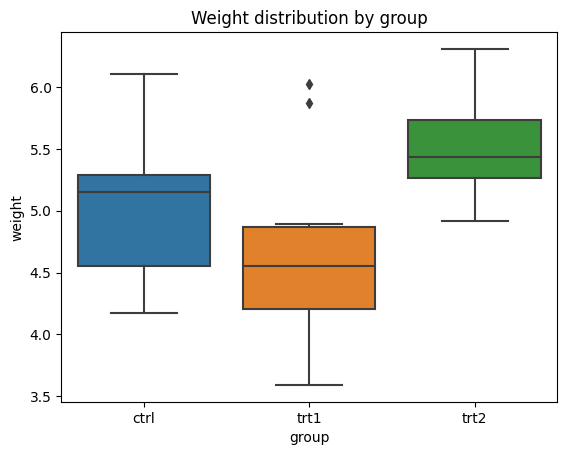

In [3]:
# Data visualization
sns.boxplot(x='group', y='weight', data=data)
plt.title('Weight distribution by group')
plt.show()

/var/folders/hl/jjlv87wn3_g7gv30rt7nps280000gn/T/ipykernel_43523/4131572808.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='group', y='weight', data=data, jitter=True, palette="Set2", size=8)


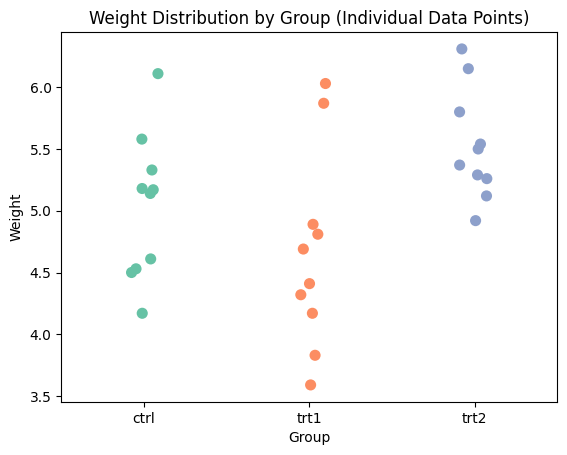

In [4]:
# Stripplot to see the distribution of individual points per group
sns.stripplot(x='group', y='weight', data=data, jitter=True, palette="Set2", size=8)
plt.title('Weight Distribution by Group (Individual Data Points)')
plt.xlabel('Group')
plt.ylabel('Weight')
plt.show()

**Boxplot and Stripplot**

For the ctrl group, we can see that the median weight is around 5.1. There is some variability in weight, with a wider dispersion (between 4.3 and 6.1) and there are no visible outliers in this group.

For the trt1 group the median weight is lower compared to the other groups, around 4.5. There are outliers observed above the upper limits, the dispersion is also somewhat high, and the weight varies between 3.5 and 5.

In the case of the trt2 group, the median weight is higher compared to trt1, close to 5.5.
The variability is smaller compared to ctrl and trt1 (less dispersion of the data) and no outliers are observed, indicating that the data are more concentrated.

**Preliminary conclusion:**  
Trt2 seems to have a positive effect on plant weight, as it shows a higher median and less variability. On the contrary, trt1 might have a negative effect compared to the control, as the median weight is lower and shows outliers.
The control group (ctrl) lies between trt1 and trt2, with higher dispersion but no outliers.
This suggests that trt2 might be more effective in increasing plant weight.
***

## 2. T-Test Statistic.
The t-Test Statistic is a measure used in statistical hypothesis testing to determine whether there is a significant difference between the means of two groups or conditions. Specifically, the paired t-Test checks whether the mean between paired observations (e.g., before and after measurements) is significantly different from zero. It is often used to determine whether a process or treatment actually has an effect on the population of interest [08].

### How does the t-Test work?
The t-Test estimates de difference between two group means, using the ratio of the difference in group means over the pooled standard error of both groups. We can calculate this using the t-test formula.

#### 2.1 Formula for the t-Test statistic.
The t-Test statistic is calculated using the formula:

$t = \frac{\bar{d}}{s_d / \sqrt{n}}$

Where:
- ${\bar{d}}$: Mean of the differences between paired samples.
- ${s_d}$ : Sample standard deviation of the differences.
- ${n}$ : Number of paired observations.

A larger $t$ value shows that the difference between group means is greater than the pooled standard error, indicating a more significant difference between the groups.

#### 2.2 Hypothesis
In the sample t-test, the null hypothesis and the alternative hypothesis are:
- Null Hypothesis ($H_0$): The mean difference between the paired samples is zero ($\mu_d = 0$).
- Alternative Hypothesis (𝐻𝑎): The mean difference is not zero ($H_a: \mu_d \neq 0$)

#### 2.3 Distribution
- The t-Test statistic follows a t-distribution with ${n-1}$ degrees of freedom ${df = {n-1}}$ when the null hypothesis is true.
- The shape of the t-distribution depends on the sample size:
    - For small samples ${n<30}$, it is wider and has heavier tails than the normal distribution.
    - For large samples, it approaches the normal distribution.

#### 2.4 P-value
- The p-value is the probability of observing a t-statistic as extreme as the calculated one if the null hypothesis is true.
- A small p-value (e.g.,${p<0.05}$) suggests rejecting the null hypothesis, indicating a significant difference.

#### 2.5 Analysis

In [5]:
# T-test: Comparison between trt1 and trt2
group_trt1 = data[data['group'] == 'trt1']['weight']
group_trt2 = data[data['group'] == 'trt2']['weight']

t_stat, p_value = stats.ttest_ind(group_trt1, group_trt2)
print("T-test between trt1 and trt2:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Conclusion: There is a significant difference between trt1 and trt2 groups.")
else:
    print("Conclusion: There is no sufficient evidence to claim a significant difference between trt1 and trt2 groups.")

T-test between trt1 and trt2:
T-statistic: -3.0101, P-value: 0.0075
Conclusion: There is a significant difference between trt1 and trt2 groups.


- **T-stadistic: -3.0101**
This value indicates the size of the relative difference between the means of groups trt1 and trt2, normalised by the variability in the data.
- **P-value: 0.0075**
The null hypothesis for the t-statistic tells us that there is no significant difference between the means of groups trt1 and trt2.
Following this definition, we see that the p-value is less than 0.05 (the typical significance level), which means that there is sufficient statistical evidence to reject the null hypothesis.

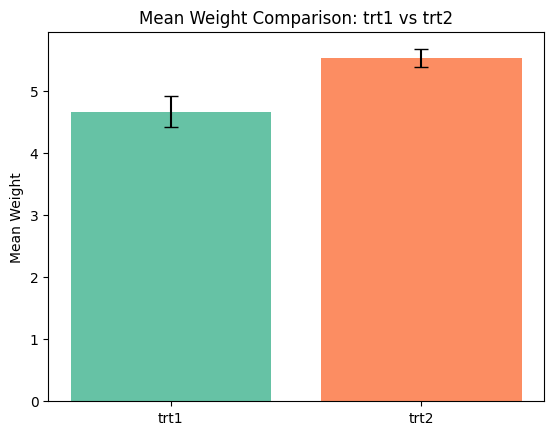

In [7]:
# Comparison between trt1 and trt2 T-test
means = [group_trt1.mean(), group_trt2.mean()]
labels = ['trt1', 'trt2']
errors = [group_trt1.std()/np.sqrt(len(group_trt1)), group_trt2.std()/np.sqrt(len(group_trt2))]

plt.bar(labels, means, yerr=errors, color=['#66c2a5', '#fc8d62'], capsize=5)
plt.title('Mean Weight Comparison: trt1 vs trt2')
plt.ylabel('Mean Weight')
plt.show()

The graph compares the mean weights between the trt1 and trt2 groups.
A standard error (the black bars) is included to give an idea of the variability within each group.

For the group trt1 we can see that the mean weight is approximately 4.7. The standard error bar is noticeable, indicating greater variability within this group.

In the case of the group trt2 the mean weight is approximately 5.6, which is higher than trt1. The standard error is lower compared to trt1, suggesting less variability.

The difference between means is visually and statistically apparent, with trt2 showing a higher mean weight.
The presence of non-overlapping error bars suggests that this difference could be statistically significant (according to the t-test results).

The graph supports the results obtained in the t-statistic, as it is clear that trt2 has a higher and less dispersed mean compared to trt1, confirming that the difference between the means is statistically significant.
***

## 3. ANOVA

ANOVA (Analysis of Variance) is a statistical method used to determine whether there are statistically significant differences between the means of three or more independent groups [09].

### 3.1 Type of tests.

- **One-way ANOVA**: Used when we are testing one categorical independent variable and one quantitative dependent variable. The independent variable should have at least three levels (i.e. at least three different groups or categories).
- **Two way ANOVA**: This is an extension of the One Way ANOVA. We use a two way ANOVA when we have one measurement variable (i.e. a quantitative variable) and two nominal variables. In other words, if the experiment has a quantitative outcome and we have two categorical explanatory variables, a two way ANOVA is appropriate.

### 3.2 Key Components of ANOVA.
1. **Groups:** ANOVA compares multiple groups (e.g., different samples, treatments, or categories).
2. **Null Hypothesis $(H0)$:** All group means are equal.
    - $H_0: \mu_1 = \mu_2 = \mu_3 = \ldots$
    - ANOVA tests whether any differences are due to random variability.
3. **Alternative Hypothesis $(𝐻𝑎)$:** At least one group mean is different from the others.
    - Between-group variance: Differences due to the group means.
    - Within-group variance: Variability within each group.

### 3.3 How does an ANOVA test work?
ANOVA determines whether the groups created by the levels of the independent variable are statistically different by calculating whether the means of the treatment levels are different from the overall mean of the dependent variable.

If any of the group means is significantly different from the overall mean, then the null hypothesis is rejected.

### 3.4 Analysis

In [6]:
# ANOVA: Comparison among ctrl, trt1, and trt2
group_ctrl = data[data['group'] == 'ctrl']['weight']

anova_stat, anova_p_value = stats.f_oneway(group_ctrl, group_trt1, group_trt2)
print("ANOVA among ctrl, trt1, and trt2:")
print(f"F-statistic: {anova_stat:.4f}, P-value: {anova_p_value:.4f}")
if anova_p_value < 0.05:
    print("Conclusion: There is a significant difference among at least two groups.")
else:
    print("Conclusion: There is no sufficient evidence to claim significant differences among the groups.")

ANOVA among ctrl, trt1, and trt2:
F-statistic: 4.8461, P-value: 0.0159
Conclusion: There is a significant difference among at least two groups.


- **ANOVA F-statistic: 4.8461**
This value measures the ratio of the variability explained by differences between groups to the variability within groups. A higher F indicates a higher probability of significant differences between groups.
- **P-value: 0.0159**
The null hypothesis in ANOVA indicates that there are no significant differences between the means of the three groups.
In this case, the p-value is less than 0.05, indicating that there are significant differences between the means of at least two of the three groups.

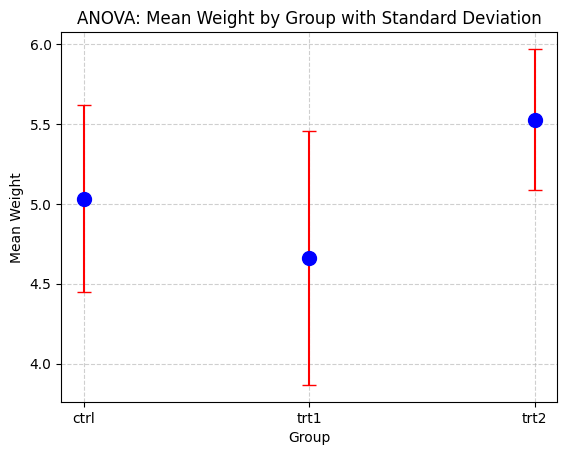

In [8]:
# Means and standard deviations of each group
group_means = data.groupby('group')['weight'].mean()
group_stds = data.groupby('group')['weight'].std()
group_labels = group_means.index

plt.errorbar(group_labels, group_means, yerr=group_stds, fmt='o', color='blue', ecolor='red', capsize=5, markersize=10)
plt.title('ANOVA: Mean Weight by Group with Standard Deviation')
plt.xlabel('Group')
plt.ylabel('Mean Weight')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The trt2 group shows the highest mean weight and the smallest dispersion (smallest standard deviation).
The trt1 group has the lowest mean and the largest standard deviation, which implies more variability in the results.
The ctrl group is in between trt1 and trt2 in terms of mean.

The ANOVA analysis seeks to determine whether there is a statistically significant difference between the means of the three groups.
If the p-value of the ANOVA is less than 0.05, we can conclude that at least one group has a significantly different mean.

Since the p-value of the ANOVA is 0.0159, and this value is less than 0.05, we can conclude the following:
- There is a statistically significant difference between the means of at least one of the groups (`ctrl`, `trt1`, `trt2`).
- This confirms the observation from the plot: the weight means are not equal in the three groups.
***

## 4. Why ANOVA instead of T-Test?

Both statistical methods can help us test hypotheses and analyze data in research studies. However, the application of the two methods differs depending on the nature of the data and the research question. 

T-Test compares the means of two groups to determine any statistical difference between each group. We use this method when we have a small sample size and we compare the means of two independent groups.
ANOVA is a statistical technique that we use to compare the means of three or more groups to determine if there are statistically significant differences among them. ANOVA analyses both, between-group and within-group variation.

Conducting multiple t-tests between different pairs of groups increases the likelihood of Type I errors (false positives).

ANOVA on the contrary, incorporates post-hoc tests (e.g., Tukey's test, Bonferroni correction) to handle multiple comparisons and control the overall error rate [10] [11].
***

## 5. Conclusion

## 6. References
[01] [Dobson, A. J. (1983) An Introduction to Statistical Modelling. London: Chapman and Hall.] (https://vincentarelbundock.github.io/Rdatasets/articles/data.html)  
[02] [Python Software Foundation. Python. (2024).] (https://www.python.org/)  
[03] [Pandas via NumFOCUS. Pandas. (2024).] (https://pandas.pydata.org/)  
[04] [NumPy team. Numpy. (2024).] (https://numpy.org/) 
[05] [Matplotlib development team. Matplotlib: Visualization with Python. (2012 - 2024).] (https://matplotlib.org/)  
[06] [Seaborn Development Team. Seaborn: Statistical Data Visualization. (2012 - 2024).] (https://seaborn.pydata.org/)  
[07] [The SciPy community. SciPy: Fundamental algorithms for scientific computing in Python. (2008 - 2024)] (https://docs.scipy.org/doc/scipy/index.html)  
[08] [Scribbr. An Introduction to t Tests. (2024)] (https://www.scribbr.com/statistics/t-test/)  
[09] [Scribbr. One-way ANOVA (2024)] (https://www.scribbr.com/statistics/one-way-anova#:~:text=ANOVA%2C%20which%20stands%20for%20Analysis,ANOVA%20uses%20two%20independent%20variables.)  
[10] [SPSS. ANOVA Vs T-Test: Understanding the Differences & Similarities. (2024)]. (https://spss-tutor.com/blogs/anova-vs-t-test-understanding-the-differences-similarities.php#:~:text=Conducting%20multiple%20t%2Dtests%20between,control%20the%20overall%20error%20rate.)  
[11] [VOXCO. ANOVA vs t-Test: Definition & Working.(2024).] (https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/)  